In [1]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential
import matplotlib.pylab as plt

import os
import glob
from PIL import Image
import numpy as np

/Users/richard/anaconda/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
batch_size = 128
num_classes = 3
epochs = 50

# input image dimensions
img_x, img_y = 20, 20

In [3]:
current_dir = os.getcwd()
train_0 = glob.glob('{}/scaled_training_images/{}/*'.format(current_dir, 'train_jpg_0'))
train_1 = glob.glob('{}/scaled_training_images/{}/*'.format(current_dir, 'train_jpg_1'))
train_2 = glob.glob('{}/scaled_training_images/{}/*'.format(current_dir, 'train_jpg_2'))

def get_image_data(filename):
    image = Image.open(filename)
#     image = image.resize((img_x, img_y))
    return np.array(image)

def get_train_data(n):
    train_data = []
    train_labels = []
    for f in train_0[:n]:
        train_data.append(get_image_data(f))
        train_labels.append(0)
    for f in train_1[:n]:
        train_data.append(get_image_data(f))
        train_labels.append(1)
    for f in train_2[:n]:
        train_data.append(get_image_data(f))
        train_labels.append(2)
    return np.asarray(train_data), np.asarray(train_labels)

test = glob.glob('{}/scaled_training_images/{}/*'.format(current_dir, 'test_jpg'))
def get_test_data(n):
    test_data = []
    test_labels = []
    for f in test[:n]:
        test_data.append(get_image_data(f))
        label = (f.split('/')[-1]).split('_')[0]
        test_labels.append(int(label))
    return np.asarray(test_data), np.asarray(test_labels)

In [4]:
x_train, y_train = get_train_data(5000)
x_test, y_test = get_test_data(1000)

x_train shape: (15000, 20, 20, 1)
15000 train samples
1000 train samples
Train on 15000 samples, validate on 1000 samples
Epoch 1/50
15000/15000 [==============================] - 3s 209us/step - loss: 0.3958 - acc: 0.8385 - val_loss: 0.7189 - val_acc: 0.8300
Epoch 2/50
15000/15000 [==============================] - 3s 219us/step - loss: 0.2131 - acc: 0.9353 - val_loss: 0.5745 - val_acc: 0.8620
Epoch 3/50
15000/15000 [==============================] - 3s 200us/step - loss: 0.1710 - acc: 0.9487 - val_loss: 0.4347 - val_acc: 0.8800
Epoch 4/50
15000/15000 [==============================] - 3s 197us/step - loss: 0.1493 - acc: 0.9562 - val_loss: 0.6823 - val_acc: 0.8290
Epoch 5/50
15000/15000 [==============================] - 3s 208us/step - loss: 0.1352 - acc: 0.9605 - val_loss: 0.3356 - val_acc: 0.9080
Epoch 6/50
15000/15000 [==============================] - 3s 205us/step - loss: 0.1220 - acc: 0.9627 - val_loss: 0.3505 - val_acc: 0.9050
Epoch 7/50
15000/15000 [==========================

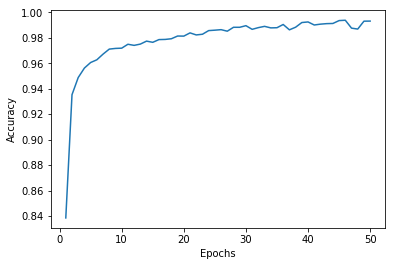

In [5]:
# https://github.com/adventuresinML/adventures-in-ml-code/blob/master/keras_cnn.py
# reshape the data into a 4D tensor - (sample_number, x_img_size, y_img_size, num_channels)
# because the MNIST is greyscale, we only have a single channel - RGB colour images would have 3
x_train = x_train.reshape(x_train.shape[0], img_x, img_y, 1)
x_test = x_test.reshape(x_test.shape[0], img_x, img_y, 1)
input_shape = (img_x, img_y, 1)

# convert the data to the right type
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'train samples')

# convert class vectors to binary class matrices - this is for use in the
# categorical_crossentropy loss below
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])


class AccuracyHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.acc = []

    def on_epoch_end(self, batch, logs={}):
        self.acc.append(logs.get('acc'))

history = AccuracyHistory()

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test),
          callbacks=[history])
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
plt.plot(range(1, epochs+1), history.acc)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [27]:
def transform_data(folder):
    train_0 = glob.glob('{}/training_images/{}/*'.format(current_dir, folder))
    for f in train_0:
        image = Image.open(f)
        image = image.resize((img_x, img_y))
        filename = f.split('/')[-1]
        image.save('{}/scaled_training_images/{}/{}.jpg'.format(current_dir, folder, filename))

In [28]:
# transform_data('test_jpg')

KeyboardInterrupt: 